In [2]:
import warnings

# Desactivar todos los warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import csv
import random

import mne
import time
import utils as u
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.signal import find_peaks

from pycrostates.cluster import ModKMeans
from pycrostates.preprocessing import extract_gfp_peaks
from pycrostates.io import ChData
from pycrostates.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    dunn_score,
    davies_bouldin_score,
)

import pickle

## Paths

In [2]:
# Define the path to the main data folder where the raw eeg can be found
DATA_FOLDER = 'E:\DATA_FOLDER'

# Define the path to the main folder where the preprocessed data will be stored
DATA_PREPROCESS = 'DATA_PREPROCESSED'
# Crear la carpeta para el paciente en la carpeta de destino
os.makedirs(DATA_PREPROCESS, exist_ok=True)

## Group-level analysis from individual clusters

In [41]:

individual_cluster_centers = []

# Recording time required for the preprocessing
t = time.time()

# Loop through subject folders
for subject in os.listdir(DATA_FOLDER):
    print(subject)

    # Construct the full path to the subject folder
    subject_path = os.path.join(DATA_FOLDER, subject)

    # Check if it's a directory
    if os.path.isdir(subject_path):
        #print(f"\nProcessing data for subject {subject}...")
        
        # Construct the path to the BrainVision files folder
        rseeg_folder = os.path.join(subject_path, 'RSEEG')
        
        # Check if the RSEEG folder exists
        if os.path.exists(rseeg_folder):

            vhdr_files = [file for file in os.listdir(rseeg_folder) if file.endswith('.vhdr')]
                        
            # Check if a .vhdr file is found
            if vhdr_files:
                
                # Construct the full path to the .vhdr file
                vhdr_path = os.path.join(rseeg_folder, vhdr_files[0])
                
                # Read the BrainVision files
                try:
                    raw = mne.io.read_raw_brainvision(vhdr_path, eog=('VEOG',), preload=True, misc='auto', scale=1, verbose=None)
                    raw.set_montage("standard_1020")
                except Exception as e:
                    print(f"Error reading files for subject {subject}: {e}")

                # Extract GFP peaks from the preprocessed signal
                gfp_peaks = extract_gfp_peaks(u.preprocessing(raw))
                
                # subject level clustering
                ModK = ModKMeans(n_clusters=3, random_state=42)
                ModK.fit(gfp_peaks, n_jobs=2)
                individual_cluster_centers.append(ModK.cluster_centers_)

            else:
                print(f"No .vhdr file found for subject {subject}.")
        else:
            print(f"RSEEG folder not found for subject {subject}.")
    else:
        print(f"There is no subject {subject}.")


group_cluster_centers = np.vstack(individual_cluster_centers).T
group_cluster_centers = ChData(group_cluster_centers, ModK.info)

# group level clustering
ModK = ModKMeans(n_clusters=3, random_state=42)
ModK.fit(group_cluster_centers, n_jobs=2)

print('Tiempo de preprocesado', time.time() - t)

sub-010002
sub-010003
sub-010004
sub-010005
sub-010006
sub-010007
sub-010010
sub-010012
sub-010015


C:\Users\enriq\AppData\Local\Temp\ipykernel_117660\4235937375.py:33: RuntimeWarning: Omitted 313 annotation(s) that were outside data range.
  raw = mne.io.read_raw_brainvision(vhdr_path, eog=('VEOG',), preload=True, misc='auto', scale=1, verbose=None)


sub-010016
sub-010017
sub-010019
sub-010020
sub-010021
sub-010022
sub-010023
sub-010024
sub-010027
sub-010028
sub-010029
sub-010030
sub-010031
sub-010032
sub-010033
sub-010034
sub-010035
sub-010036
sub-010037
sub-010038
sub-010039
sub-010040
sub-010041
sub-010042
sub-010044
sub-010045
sub-010046
sub-010047
sub-010048
sub-010049
sub-010050
sub-010051
sub-010052
sub-010053
sub-010056
sub-010059
sub-010060
sub-010061
sub-010062
sub-010063
sub-010064
sub-010065
sub-010066
sub-010067
sub-010068
sub-010069
sub-010070
sub-010071
sub-010072
sub-010073
sub-010074
sub-010075
sub-010076
sub-010077
sub-010078
sub-010079
sub-010080
sub-010081
sub-010083
sub-010084
sub-010085
sub-010086
sub-010087
sub-010088
sub-010089
sub-010090
sub-010091
sub-010092
sub-010093
sub-010094
sub-010100


C:\Users\enriq\AppData\Local\Temp\ipykernel_117660\4235937375.py:33: RuntimeWarning: Omitted 170 annotation(s) that were outside data range.
  raw = mne.io.read_raw_brainvision(vhdr_path, eog=('VEOG',), preload=True, misc='auto', scale=1, verbose=None)


sub-010104
sub-010126
sub-010134
sub-010136
sub-010137
sub-010138
sub-010141
sub-010142
sub-010146
sub-010148
sub-010150
sub-010152
sub-010155
sub-010157
sub-010162
sub-010163
sub-010164
sub-010165
sub-010166
sub-010168
sub-010170
sub-010176
sub-010183
sub-010191
sub-010192
sub-010193
sub-010194
sub-010195
sub-010196
sub-010197
sub-010199
sub-010200
sub-010201
sub-010202
sub-010204
sub-010207
sub-010210
sub-010213
sub-010214
sub-010215
sub-010216


C:\Users\enriq\AppData\Local\Temp\ipykernel_117660\4235937375.py:33: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, eog=('VEOG',), preload=True, misc='auto', scale=1, verbose=None)


sub-010218
sub-010219
sub-010220
sub-010222
sub-010223
sub-010224
sub-010226
sub-010227
sub-010228
sub-010230
sub-010231
sub-010232
sub-010233
sub-010234
sub-010236
sub-010238
sub-010239
sub-010240
sub-010241
sub-010242
sub-010243
sub-010244
sub-010245
sub-010246
sub-010247
sub-010248
sub-010249
sub-010250
sub-010251
sub-010252
sub-010254
sub-010255
sub-010256
sub-010257
sub-010258
sub-010260
sub-010261
sub-010262
sub-010263
sub-010264
sub-010265
sub-010266
sub-010267
sub-010268
sub-010269
sub-010270
sub-010271
sub-010272
sub-010273
sub-010274
sub-010275
sub-010276
sub-010277
sub-010278
sub-010279
sub-010280
sub-010282
sub-010283
sub-010284
sub-010285
sub-010286
sub-010287
sub-010288
sub-010289
sub-010290
sub-010291
sub-010292
sub-010294
sub-010295
sub-010296
sub-010297
sub-010298
sub-010299
sub-010300
sub-010301
sub-010302
sub-010303
sub-010304
sub-010305
sub-010306
sub-010307
sub-010308
sub-010309
sub-010310
sub-010311
sub-010314
sub-010315
sub-010316
sub-010317
sub-010318
sub-010319

In [50]:
ModK.reorder_clusters(order=[1, 2, 0])
ModK.rename_clusters(new_names=["AB", "C", "D"])

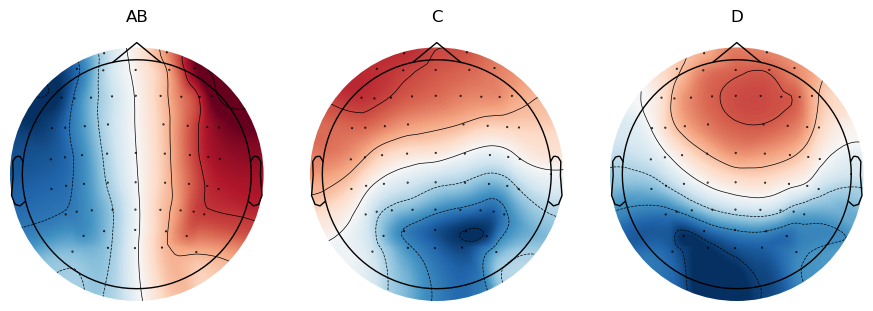

In [51]:
ModK.plot()
plt.show()

In [52]:
# Save
with open('E:\m3_2500.pickle', 'wb') as f:
    pickle.dump(ModK, f)

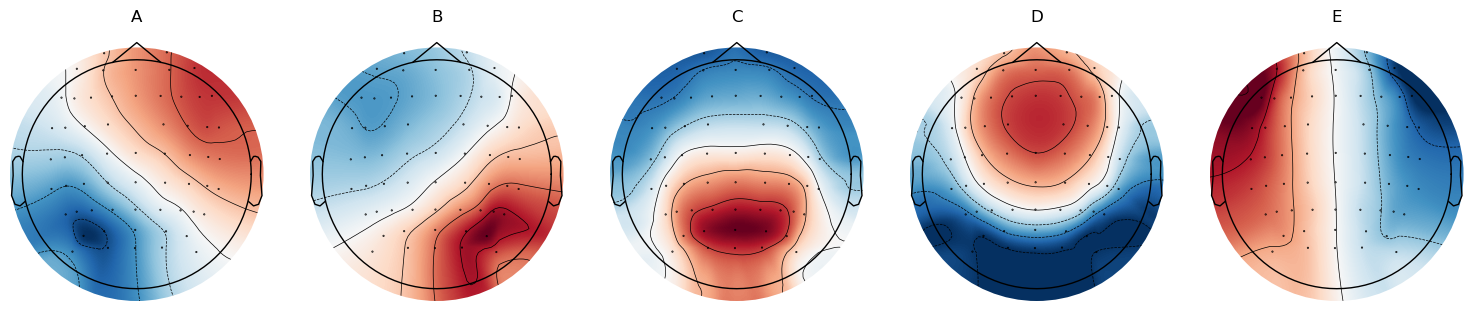

In [23]:
ModK.plot()
plt.show()

#### Obtaining required clusters

In [22]:
model = 'E:\m5_2500.pickle'

# Load
with open(model, 'rb') as f:
    ModK = pickle.load(f)

In [33]:
# Supongamos que `ModK` es tu objeto `ModKMeans` original
# Extraemos los centros de los clusters actuales
cluster_centers = ModK.cluster_centers_

# Seleccionamos los 4 primeros centros de los clusters
new_cluster_centers = cluster_centers[:4]

new_cluster_centers = np.vstack(new_cluster_centers).T
new_cluster_centers = ChData(new_cluster_centers, ModK.info)

# Crear un nuevo objeto `ModKMeans` con los nuevos centros de clusters
new_ModK = ModKMeans(n_clusters=4,)
new_ModK.fit(new_cluster_centers, n_jobs=2)

In [37]:
new_ModK.reorder_clusters(order=[3, 2, 0, 1])
new_ModK.rename_clusters(new_names=["A", "B", "C", "D"])

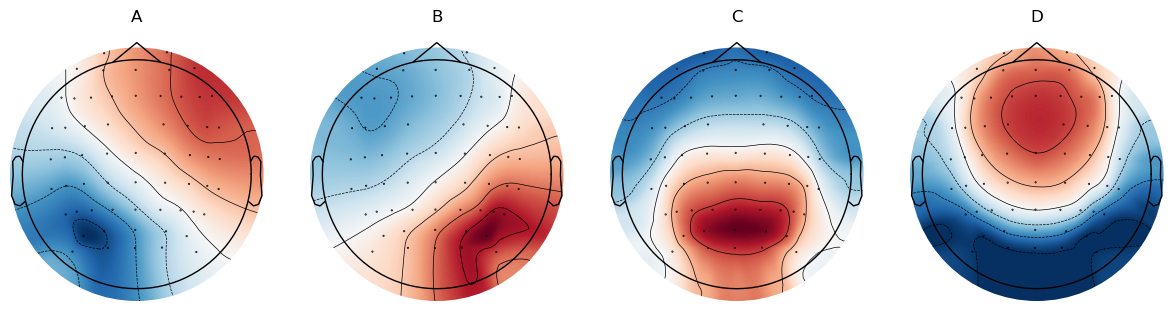

In [38]:
new_ModK.plot()
plt.show()

#### Evaluating clustering fits

In [53]:
ModK

Method,ModKMeans
Fit,100 initializations on 639 samples
Cluster centers,3
GEV,73.37 %
Cluster centers names,"AB, C, D"
Channels,61 EEG


In [10]:
ModK

Method,ModKMeans
Fit,100 initializations on 852 samples
Cluster centers,4
GEV,73.18 %
Cluster centers names,"A, B, C, D"
Channels,61 EEG


In [12]:
ModK

Method,ModKMeans
Fit,100 initializations on 1065 samples
Cluster centers,5
GEV,73.10 %
Cluster centers names,"A, B, C, D, E"
Channels,61 EEG


In [9]:
ModK

Method,ModKMeans
Fit,100 initializations on 1278 samples
Cluster centers,6
GEV,74.45 %
Cluster centers names,"A, B, C, D, E, F"
Channels,61 EEG


In [15]:
ModK

Method,ModKMeans
Fit,100 initializations on 1491 samples
Cluster centers,7
GEV,74.24 %
Cluster centers names,"A, B, C, D, E, F, G"
Channels,61 EEG


In [21]:
ModK

Method,ModKMeans
Fit,100 initializations on 1704 samples
Cluster centers,8
GEV,75.35 %
Cluster centers names,"A, B, C, D, E, F, G, H"
Channels,61 EEG


In [6]:
cluster_numbers = range(3, 10)
scores = {
    "Silhouette": np.zeros(len(cluster_numbers)),
    "Calinski-Harabasaz": np.zeros(len(cluster_numbers)),
    "Dunn": np.zeros(len(cluster_numbers)),
    "Davies-Bouldin": np.zeros(len(cluster_numbers)),
}

In [7]:
# Directory containing the files
directory = r"E:\Microestados"

# Range of cluster numbers to evaluate
cluster_numbers = range(3, 10)

# Initialize scores dictionary
scores = {
    "Silhouette": np.zeros(len(cluster_numbers)),
    "Calinski-Harabasz": np.zeros(len(cluster_numbers)),
    "Dunn": np.zeros(len(cluster_numbers)),
    "Davies-Bouldin": np.zeros(len(cluster_numbers)),
}

# Function to process each file and evaluate clusters
def process_file(filepath):
    try:
        # Open the pickle file
        with open(filepath, 'rb') as file:
            data = pickle.load(file)
        
        print(f"Processing file: {filepath}")
        
        # Assuming data is a NumPy array or can be converted to one
        for i, num_clusters in enumerate(cluster_numbers):
            # Perform clustering (assuming data can be clustered, e.g., KMeans)
            kmeans = KMeans(n_clusters=num_clusters, random_state=42)
            labels = kmeans.fit_predict(data)
            
            # Calculate evaluation metrics using pycrostates
            scores["Silhouette"][i] += silhouette_score(data, labels)
            scores["Calinski-Harabasz"][i] += calinski_harabasz_score(data, labels)
            scores["Dunn"][i] += dunn_score(data, labels)
            scores["Davies-Bouldin"][i] += davies_bouldin_score(data, labels)
    
    except Exception as e:
        print(f"Error processing file {filepath}: {e}")

# Iterate over all files in the directory
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    
    # Check if the path is a file (not a directory)
    if os.path.isfile(filepath):
        process_file(filepath)

Processing file: E:\Microestados\m3_2500.pickle
Error processing file E:\Microestados\m3_2500.pickle: float() argument must be a string or a real number, not 'ModKMeans'
Processing file: E:\Microestados\m4_2500.pickle
Error processing file E:\Microestados\m4_2500.pickle: float() argument must be a string or a real number, not 'ModKMeans'
Processing file: E:\Microestados\m5_2500.pickle
Error processing file E:\Microestados\m5_2500.pickle: float() argument must be a string or a real number, not 'ModKMeans'
Processing file: E:\Microestados\m6_2500.pickle
Error processing file E:\Microestados\m6_2500.pickle: float() argument must be a string or a real number, not 'ModKMeans'
Processing file: E:\Microestados\m7_2500.pickle
Error processing file E:\Microestados\m7_2500.pickle: float() argument must be a string or a real number, not 'ModKMeans'
Processing file: E:\Microestados\m8_2500.pickle
Error processing file E:\Microestados\m8_2500.pickle: float() argument must be a string or a real numb

In [ ]:
# Open the pickle file
with open(r"E:\M4_2500.pickle", 'rb') as file:
    ModK = pickle.load(file)

In [ ]:
scores["Silhouette"][-1] = silhouette_score(ModK)
scores["Calinski-Harabasaz"][-1] = calinski_harabasz_score(ModK)
scores["Dunn"][-1] = dunn_score(ModK)
scores["Davies-Bouldin"][-1] = davies_bouldin_score(ModK)